/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Predicciones completadas y guardadas en 'datasetv2_with_predictions.csv'


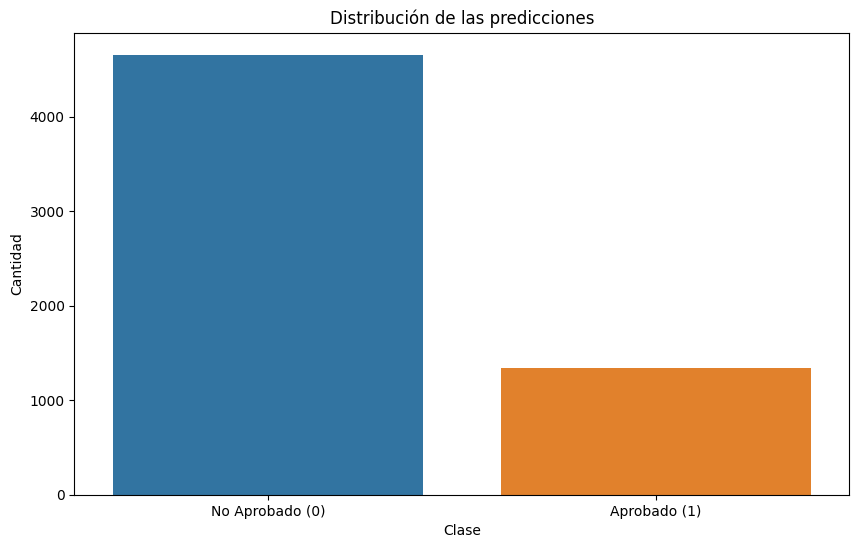

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Función para preprocesar los datos
def preprocess_data(data):
    # Convertir DAYS_EMPLOYED a positivo
    data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs()

    # Asignar 0 a CAR_OWN_AGE donde FLAG_OWN_CAR es 'N'
    data.loc[data['FLAG_OWN_CAR'] == 'N', 'CAR_OWN_AGE'] = 0

    # Rellenar los valores faltantes
    num_columns = ['CAR_OWN_AGE', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED',
                   'CNT_FAM_MEMBERS', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG',
                   'COMMONAREA_AVG', 'FLOORSMAX_AVG']
    cat_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']

    for col in num_columns:
        data[col].fillna(0, inplace=True)

    for col in cat_columns:
        data[col].fillna('No aplica', inplace=True)

    return data[num_columns + cat_columns], num_columns, cat_columns

# Cargando el dataset de entrenamiento y preprocesamiento
dataset_train = pd.read_csv('datasetv2train.csv')
X_train, num_columns, cat_columns = preprocess_data(dataset_train)
y_train = dataset_train['target']

# Preprocesador y modelo
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=0))
])

# Entrenamiento del modelo
pipeline.fit(X_train, y_train)

# Cargando el dataset de predicciones y preprocesamiento
dataset_pred = pd.read_csv('datasetv2.csv')
X_pred, _, _ = preprocess_data(dataset_pred)

# Haciendo predicciones
predictions = pipeline.predict(X_pred)

# Añadiendo las predicciones al dataset
dataset_pred['target'] = predictions

# Guardando las predicciones en un nuevo archivo CSV
dataset_pred.to_csv('datasetv2_with_predictions.csv', index=False)

print("Predicciones completadas y guardadas en 'datasetv2_with_predictions.csv'")

# Gráfica de las predicciones
plt.figure(figsize=(10, 6))

# Contar la cantidad de predicciones para cada clase
sns.countplot(x='target', data=dataset_pred)

plt.title('Distribución de las predicciones')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0,1], labels=['No Aprobado (0)', 'Aprobado (1)'])

plt.show()